In [1]:
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy
from scipy.fft import fft, rfft, fftshift,rfft2
from scipy.special import jv
from matplotlib.image import NonUniformImage

In [2]:
U = numpy.load('Phase0U.npy')
Q = numpy.load('Phase0Q.npy')
Flux = numpy.load('Phase0Flux.npy')
lam = numpy.load('WaveGrid.npy')

In [3]:
Fluxmax = Flux.max()
U=U/Fluxmax
Q=Q/Fluxmax
Flux=Flux/Fluxmax
Polarization = numpy.sqrt(U*U+Q*Q)/Flux

/var/folders/hr/9sdqv6450z16rzwk76fgsygw0000gn/T/ipykernel_87678/3705102920.py:5: RuntimeWarning: invalid value encountered in divide
  Polarization = numpy.sqrt(U*U+Q*Q)/Flux


In [4]:
Utot=U.sum(axis=(1,2))
Qtot=Q.sum(axis=(1,2))
Ftot = Flux.sum(axis=(1,2))
Ptot = numpy.sqrt(Utot*Utot+Qtot*Qtot)/Ftot

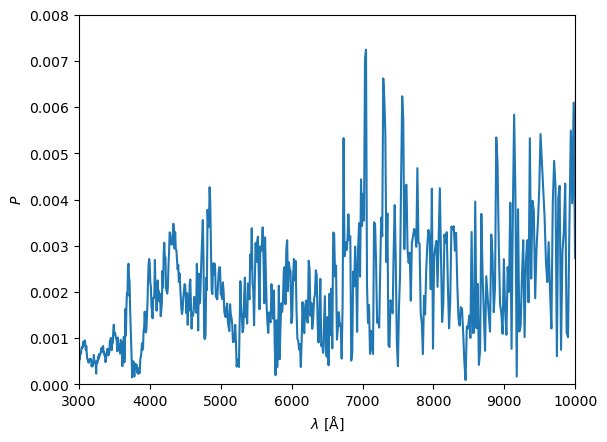

In [5]:
plt.plot(lam,Ptot)
plt.xlabel(r'$\lambda$ [Å]')
plt.ylabel(r'$P$')
plt.xlim((3000,10000))
plt.ylim((0,0.008))
plt.savefig('Plam.pdf')

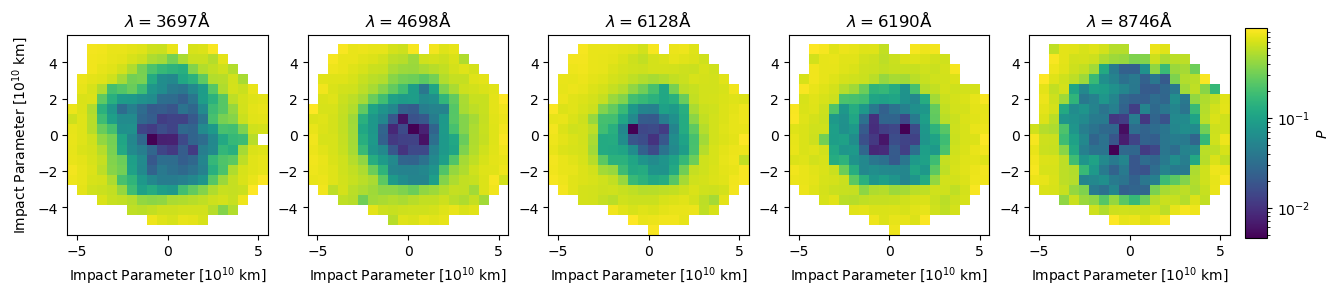

In [6]:
wls = [3700, 4700, 6128, 6189,8750]
idxs = [ numpy.abs(lam - l).argmin() for l in wls]
fig,axs = plt.subplots(1,5, figsize=(15, 3))
for i, idx in enumerate(idxs):
    im=axs[i].imshow(Polarization[idx,:,:],norm=LogNorm(),extent=[-32000*3600*24*20/1e10, 32000*3600*24*20/1e10,-32000*3600*24*20/1e10, 32000*3600*24*20/1e10])
    axs[i].set_title(r'$\lambda={:.0f}$Å'.format(lam[idx]))
    axs[i].set_xlabel(r"Impact Parameter [$10^{10}~\text{km}$]")
    if i==0:
        axs[i].set_ylabel(r"Impact Parameter [$10^{10}~\text{km}$]")
fig.subplots_adjust(right=0.90)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"$P$")
plt.savefig('P.pdf')